In [ ]:
#!pip install fancyimpute

## **Setting** **Environment**

In [ ]:
#library lading for dataset 
import pandas as pd
#library for performing numerical operation
import numpy as np
#library for visualization
import matplotlib.pyplot as plt
#library for visualization
import seaborn as sns
#library for counting variables
from collections import Counter
#load the libraries for ML algorithm
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
#for modeling train and test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#for checking accuracy metrics in regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from fancyimpute import KNN


In [ ]:
#for making an inline graph display 
get_ipython().run_line_magic('matplotlib','inline')

In [ ]:
#load the data 
train = pd.read_csv('/content/drive/MyDrive/ML_Datasets/train_cab.csv',sep=',')
test = pd.read_csv('/content/drive/MyDrive/ML_Datasets/test.csv', sep=',')

## **DATA** **Explortion**

In [ ]:
#understanding the training data
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [ ]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


Info: Training data contains missing values in **passenger_count**

In [ ]:
#understanding test data 
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


Info: Test data is fine and not having any null values

In [ ]:
#check the dimention of data in both train and test dataset
print("Shape of training dataset : ", train.shape)
print("Shape of test dataset : ", test.shape)

Shape of training dataset :  (16067, 7)
Shape of test dataset :  (9914, 6)


In [ ]:
#check which type of data present in the dataset with their types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


Info: Here we can see fare_amount and pickup_datetime is in object type so we need to convert it into respective types float and datetime object

In [ ]:
#check the type of data present in test dataset with their types
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


Info: Here we can see pickup_datetime is in object type so we need to convert it into datetime object

In [ ]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [ ]:
#convert fare_amount to numeric in train data
train['fare_amount'] = pd.to_numeric(train['fare_amount'],errors='coerce')

In [ ]:
#convert the pickup_datetime object to timestamp dtypes 
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'],errors = 'coerce', format='%Y-%m-%d %H:%M:%S UTC')

In [ ]:
#check dataype changed or not
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
dtype: object

# #General assumption related for Cab fare prediction as per dataset

1.   Passanger count in cab for hatchbag and suv is MAX 6
2.   Cab fare values cannot be -ve and cannot be charged high for less distance

3.   Longitudes valid range from -180 to +180 
4.   Latitudes valid range from -90 to +90




#Explore the column data 

In [ ]:

#seperate the passenger count column as its not continuous and making it categorical
cat_var = 'passenger_count'
numerical_var = ['fare_amount','pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']

In [ ]:
#setting sns library for plots
sns.set(style= 'darkgrid', palette='Set2')

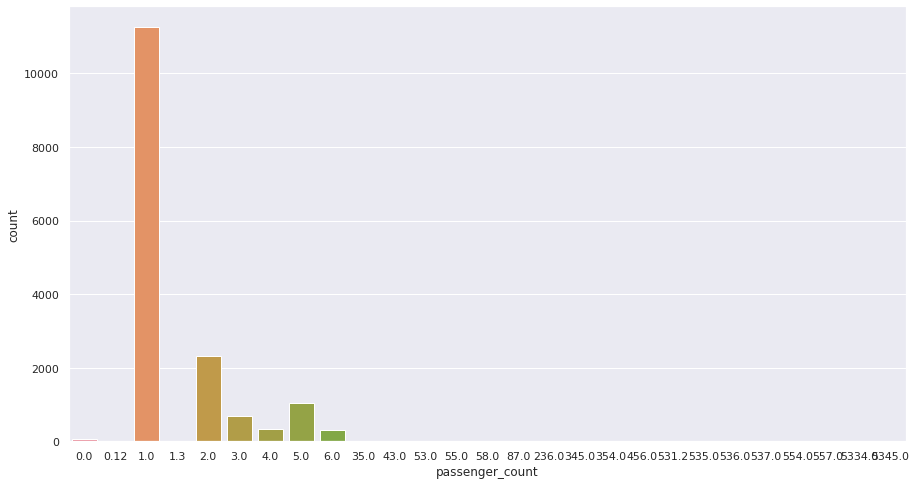

In [ ]:
#count plot on passenger count
plt.figure(figsize=(15,8))
sns.countplot(x="passenger_count", data=train)

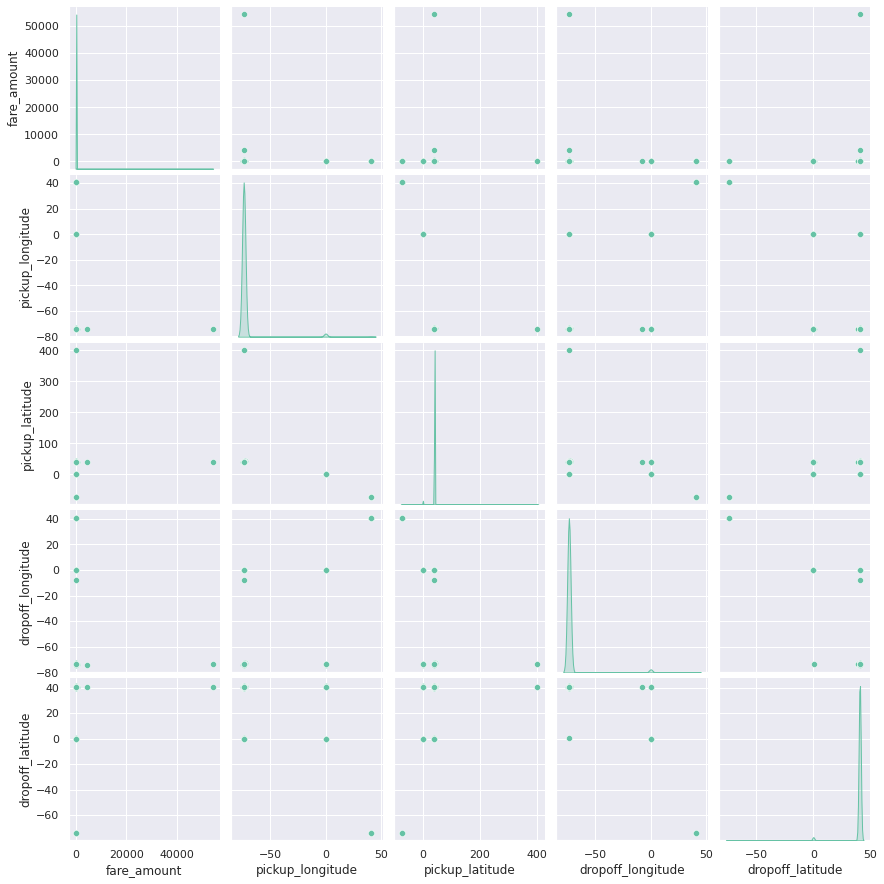

In [ ]:
#vdf = sns.load_dataset(train)
sns.set_style("darkgrid")
sns.pairplot(train[numerical_var], diag_kind='kde',kind='scatter',palette='hls')
plt.show()

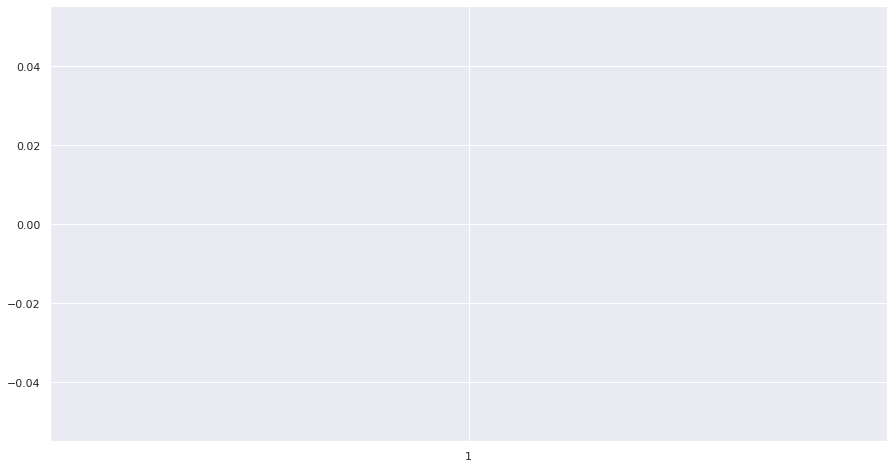

In [ ]:
#checking relationship between passenger and fare amount
plt.figure(figsize=(15,8))
plt.boxplot(train['fare_amount'])
plt.show()

In [ ]:
#Note: Due to huge outlier difference the box plot is not visible now we first remove the outliers and normalize the data as we have seen in scatterplot

# Fare amount cannot be negative value, that doesn't make sense so will remove data having less than 0 fare amount

In [ ]:
#check how many rows having -ve values of fareamount
sum(train['fare_amount']<1)
print(train[train['fare_amount']<1])

       fare_amount     pickup_datetime  ...  dropoff_latitude  passenger_count
2039         -2.90 2010-03-09 23:37:10  ...         40.641952              1.0
2486         -2.50 2015-03-22 05:14:27  ...         40.720539              1.0
2780          0.01 2015-05-01 15:38:41  ...         40.713997              1.0
10002         0.00 2010-02-15 14:26:01  ...         40.713960              1.0
13032        -3.00 2013-08-30 08:57:10  ...         40.741357              4.0

[5 rows x 7 columns]


In [ ]:
#remove this rows from training dataset 
train = train.drop(train[train['fare_amount']<1].index, axis=0)

In [ ]:
train.shape

(16062, 7)

# Check passenger count as per assumption we will check max 6 passenger rest we will remove as for Hatchbag and suv max capacity is 6 members

In [ ]:
#finding count based on number of passenger in cab
for i in range(4,15):
  print("passenger count "+str(i)+" is ",sum(train['passenger_count']>i))

passenger count 4 is  1367
passenger count 5 is  322
passenger count 6 is  20
passenger count 7 is  20
passenger count 8 is  20
passenger count 9 is  20
passenger count 10 is  20
passenger count 11 is  20
passenger count 12 is  20
passenger count 13 is  20
passenger count 14 is  20


In [ ]:
#we can see that 20 obersations we are getting from 6 so rest we will not consider
train[train['passenger_count']>6]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50,-73.988977,40.721068,-73.982368,40.732064,345.0


In [ ]:
sum(train['passenger_count']>6)

20

In [ ]:
#will check the data for passenger_count less than 1 as it doesn't make sense
train[train['passenger_count']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34.0,2015-06-02 23:16:15,-73.974899,40.751095,-73.908546,40.881878,0.00
566,4.9,2012-01-28 21:33:18,-73.955322,40.782840,-73.955797,40.773673,0.00
678,6.5,2012-02-27 07:24:20,-73.983397,40.738183,-73.971395,40.758023,0.00
1160,13.3,2011-05-25 23:58:48,-73.998360,40.740348,-73.946455,40.777348,0.00
1935,10.1,2011-10-23 11:09:28,-73.971400,40.795000,-73.967900,40.768600,0.00
2200,8.1,2011-05-23 16:54:19,-73.988008,40.748303,-74.005185,40.738733,0.00
2425,8.9,2011-11-25 22:47:33,-73.999900,40.738600,-73.971800,40.746300,0.00
3034,5.7,2011-03-06 12:03:14,-73.986557,40.745783,-73.994545,40.729995,0.00
3413,7.3,2011-02-28 06:39:16,-73.973413,40.743708,-73.985220,40.741583,0.00
3481,11.3,2011-11-30 17:23:02,-73.968100,40.762500,-73.984400,40.760900,0.00


In [ ]:
sum(train['passenger_count']<1)

58

Info: As we can we have 58 rows which is having passenger count is less than 1 so we will remove those columns


In [ ]:
#lets confirm from test data also for passenger count unique values
test['passenger_count'].value_counts()

1    6914
2    1474
5     696
3     447
4     206
6     177
Name: passenger_count, dtype: int64

In [ ]:
#From above results we can conclude that 20 rows of high numbers of passenger count and 58 rows of zero passenger count doesn't fit good for analysis as it contains outliers and false data
train = train.drop(train[train['passenger_count']>6].index, axis=0)
train = train.drop(train[train['passenger_count']<1].index, axis=0)

In [ ]:
train.shape

(15984, 7)

# 3rd part latitude and longitudes valid ranges

In [ ]:
#check for valid range in each column of data
print("pickup_Longitude above 180 is", sum(train['pickup_longitude']>180))
print("pickup_Longitude below -180 is", sum(train['pickup_longitude']<-180))

print("pickup_Latitude above 90 is", sum(train['pickup_latitude']>90))
print("pickup_Latitude below -90 is", sum(train['pickup_latitude']<-90))

print("dropoff_Longitude above 180 is", sum(train['dropoff_longitude']>180))
print("dropoff_Longitude below -180 is", sum(train['dropoff_longitude']<-180))

print("dropoff_Latitude above 90 is", sum(train['dropoff_latitude']>90))
print("dropoff_Latitude below -90 is", sum(train['dropoff_latitude']<-90))


pickup_Longitude above 180 is 0
pickup_Longitude below -180 is 0
pickup_Latitude above 90 is 1
pickup_Latitude below -90 is 0
dropoff_Longitude above 180 is 0
dropoff_Longitude below -180 is 0
dropoff_Latitude above 90 is 0
dropoff_Latitude below -90 is 0


In [ ]:
#printing min and max values in location related data
print(min(train['pickup_longitude']),'\t', max(train['pickup_longitude']))
print(min(train['pickup_latitude']),'\t',max(train['pickup_latitude']))
print(min(train['dropoff_longitude']),'\t',max(train['dropoff_longitude']))
print(min(train['dropoff_latitude']),'\t',max(train['dropoff_latitude']))


-74.438233 	 40.766125
-74.006893 	 401.083332
-74.42933199999999 	 40.802437
-74.006377 	 41.366138


Info: Above result shows only 1 data point is out of range so we will remove that data point to avoid skewness in data

In [ ]:
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)

In [ ]:
train.shape

(15983, 7)

In [ ]:
#We need to check for zero values in latitudes and longitudes
for i in numerical_var[1:]:
  print(i,"equal to 0 is",sum(train[i]==0))

pickup_longitude equal to 0 is 311
pickup_latitude equal to 0 is 311
dropoff_longitude equal to 0 is 312
dropoff_latitude equal to 0 is 310


In [ ]:
#we need to remove all location related data which contains zero value
for i in numerical_var[1:]:
  #print(i,"equal to 0 is",sum(train[i]==0))
  train = train.drop(train[train[i] == 0].index, axis=0)

In [ ]:
train.shape

(15661, 7)

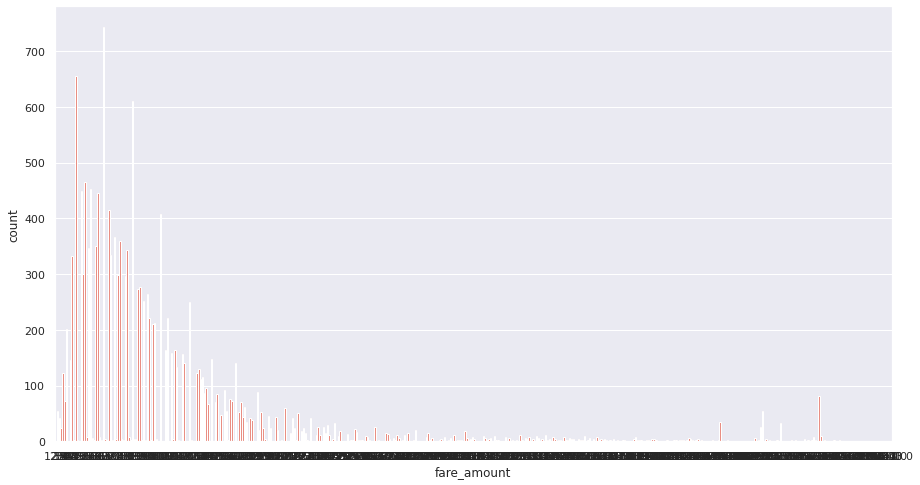

In [ ]:
#plot the graph for fare amount feature
plt.figure(figsize=(15,8))
sns.countplot(x=train['fare_amount'], data=train,  color='salmon')

In [ ]:
#save the preprocessed version 1 for training file 
df_version1 = train.copy()

# so far we removed data on asumptions and we have normalised data of (15661,7) from (16067,7)

## **Missing Value Treatment**

In [ ]:
#check for missing values in train data
train.isna().sum()

fare_amount          22
pickup_datetime       1
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
passenger_count      55
dtype: int64

In [ ]:
test.isna().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [ ]:
#checking rows for all null data in training dataset
null_data = train[train.isnull().any(axis=1)]
print(null_data)

       fare_amount     pickup_datetime  ...  dropoff_latitude  passenger_count
8              NaN 2012-12-03 13:10:00  ...         40.731628              1.0
31           22.54 2015-06-21 21:46:34  ...         40.660366              NaN
64            7.30 2011-11-07 10:47:40  ...         40.735362              NaN
69             NaN 2015-05-12 23:51:42  ...         40.780087              1.0
82            8.50 2013-06-14 08:27:43  ...         40.777676              NaN
...            ...                 ...  ...               ...              ...
8178           NaN 2015-03-10 06:19:43  ...         40.713360              1.0
8226           NaN 2011-08-13 01:33:02  ...         40.703821              4.0
8259         57.54 2015-05-03 16:49:52  ...         40.803551              NaN
8306          6.90 2010-12-12 11:43:16  ...         40.765198              NaN
16066         8.50 2011-12-14 06:24:33  ...         40.761975              NaN

[78 rows x 7 columns]


In [ ]:
#Checking which row having null in the pickup_datetime column
train[train['pickup_datetime'].isnull()]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
1327,11.5,NaT,-73.981947,40.7282,-73.988582,40.759202,1.0


In [ ]:
#remove the row which having null value axis = 0 means removing row
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis= 0) 
#check row deleted or not if isnull count = 0 
print(train['pickup_datetime'].isnull().sum())

0


In [ ]:
train.shape

(15660, 7)

In [ ]:
#create dataframe for missing percentage 
missing_values = pd.DataFrame(train.isnull().sum())
#setting index to data frame
missing_values = missing_values.reset_index()
missing_values

,index,0
0,fare_amount,22
1,pickup_datetime,0
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [ ]:
#Show the missing % of data for columns
missing_values = missing_values.rename(columns={'index':'Variables', 0 : 'Missing_%'})
missing_values

#calculate persentage
missing_values['Missing_%'] = (missing_values['Missing_%']/len(train))*100
missing_values = missing_values.sort_values('Missing_%', ascending=False).reset_index(drop=True)
missing_values

,Variables,Missing_%
0,passenger_count,0.351213
1,fare_amount,0.140485
2,pickup_datetime,0.000000
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [ ]:
missing_values.columns

Index(['Variables', 'Missing_%'], dtype='object')

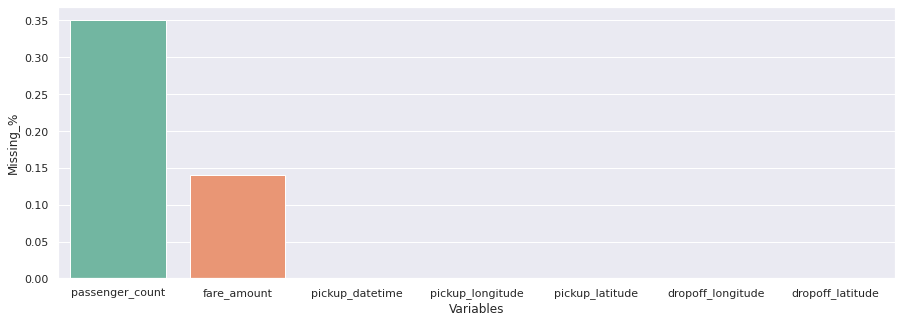

In [ ]:
#plot the graph for missing vaues 
plt.figure(figsize=(15,5))
sns.barplot(x=missing_values['Variables'], y = missing_values['Missing_%'], data= missing_values)
plt.show()

In [ ]:
train['fare_amount'].describe()

count    15638.000000
mean        15.117908
std        435.982175
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [ ]:
#fill the missing values of rows with imputation technique we are not using mean and mode as data is biased
#using  KNN for imputation method with k=19(assumption)
train.std()

fare_amount          435.982175
pickup_longitude       2.659135
pickup_latitude        2.613389
dropoff_longitude      2.710922
dropoff_latitude       2.632484
passenger_count        1.266096
dtype: float64

In [ ]:
#sepeate the datetime columns from dataframe and save for later
pickup_datetime = pd.DataFrame(train['pickup_datetime'])

In [ ]:
columns = list(train.columns)
columns.pop(1)
columns

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [ ]:
#Impute the missing values using KNN Technique for rows
from fancyimpute import KNN
train = pd.DataFrame(KNN(k=19).fit_transform(train.drop('pickup_datetime',axis=1)),columns=columns, index=train.index)

Imputing row 1/15660 with 0 missing, elapsed time: 44.540
Imputing row 101/15660 with 0 missing, elapsed time: 44.542
Imputing row 201/15660 with 0 missing, elapsed time: 44.544
Imputing row 301/15660 with 0 missing, elapsed time: 44.545
Imputing row 401/15660 with 0 missing, elapsed time: 44.546
Imputing row 501/15660 with 0 missing, elapsed time: 44.547
Imputing row 601/15660 with 0 missing, elapsed time: 44.549
Imputing row 701/15660 with 0 missing, elapsed time: 44.550
Imputing row 801/15660 with 0 missing, elapsed time: 44.552
Imputing row 901/15660 with 0 missing, elapsed time: 44.553
Imputing row 1001/15660 with 0 missing, elapsed time: 44.554
Imputing row 1101/15660 with 0 missing, elapsed time: 44.555
Imputing row 1201/15660 with 0 missing, elapsed time: 44.555
Imputing row 1301/15660 with 0 missing, elapsed time: 44.555
Imputing row 1401/15660 with 0 missing, elapsed time: 44.558
Imputing row 1501/15660 with 0 missing, elapsed time: 44.559
Imputing row 1601/15660 with 0 missi

In [ ]:
#confirmation for missing values resolved
train.isna().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

## Outlier Treatement for training dataset

In [ ]:
#comparing std deviation before and after imputation we can see values are matching 
train.std()

fare_amount          435.675905
pickup_longitude       2.659135
pickup_latitude        2.613389
dropoff_longitude      2.710922
dropoff_latitude       2.632484
passenger_count        1.264159
dtype: float64

Info: we can see only fare amount data is having high standard deviation hence we need to remove outliers from training dataset

In [ ]:
train['fare_amount'].describe()

count    15660.000000
mean        15.110876
std        435.675905
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [ ]:
#for fare amount data is having more deviated top 20 highest values
train['fare_amount'].sort_values(ascending=False)[:20]

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
Name: fare_amount, dtype: float64

In [ ]:
#for fare amount data is having more deviated top 20 lowest values
train['fare_amount'].sort_values(ascending=True)[:20]

1427     1.14
4954     2.50
10705    2.50
7728     2.50
8603     2.50
8596     2.50
5449     2.50
657      2.50
13571    2.50
15370    2.50
13488    2.50
8547     2.50
11153    2.50
11222    2.50
15257    2.50
7908     2.50
7918     2.50
1684     2.50
1671     2.50
4539     2.50
Name: fare_amount, dtype: float64

In [ ]:
#from above observation we can see Rs. 54343.00 ,4343.00 fareamount is extreme outlier 

In [ ]:
#drop the fare amount data which is having higher fare than 454 
train = train.drop(train[train['fare_amount']> 454].index, axis=0)

print(train.shape)


(15658, 6)


In [ ]:
#save the dataframe as 2nd version of outlier_treatment
df_version2 = pd.merge(pickup_datetime, train, right_index=True, left_index=True)

In [ ]:
train.std()

fare_amount          10.780425
pickup_longitude      2.659305
pickup_latitude       2.613556
dropoff_longitude     2.711095
dropoff_latitude      2.632652
passenger_count       1.264218
dtype: float64

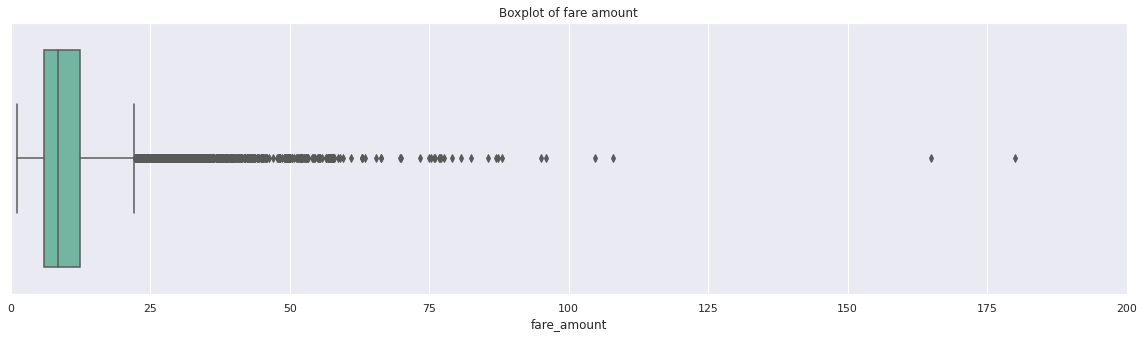

In [ ]:
plt.figure(figsize=(20,5))
plt.xlim(0,200)
sns.boxplot(x=train['fare_amount'], data=train, orient='h')
plt.title('Boxplot of fare amount')
plt.show()

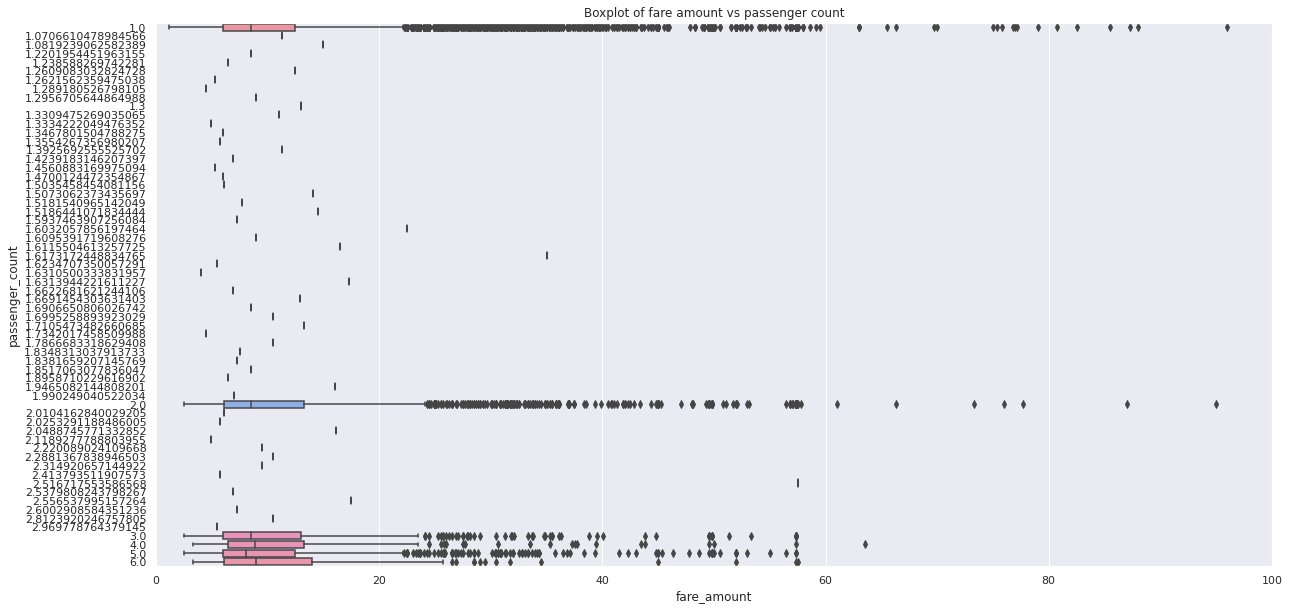

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
sns.boxplot(x=train['fare_amount'], y=train['passenger_count'], data=train, orient='h')
plt.title('Boxplot of fare amount vs passenger count')
plt.show()

In [ ]:
#converting passenger count from float dtype to categorical element 
train['passenger_count'] = train['passenger_count'].round().astype('object').astype('category')

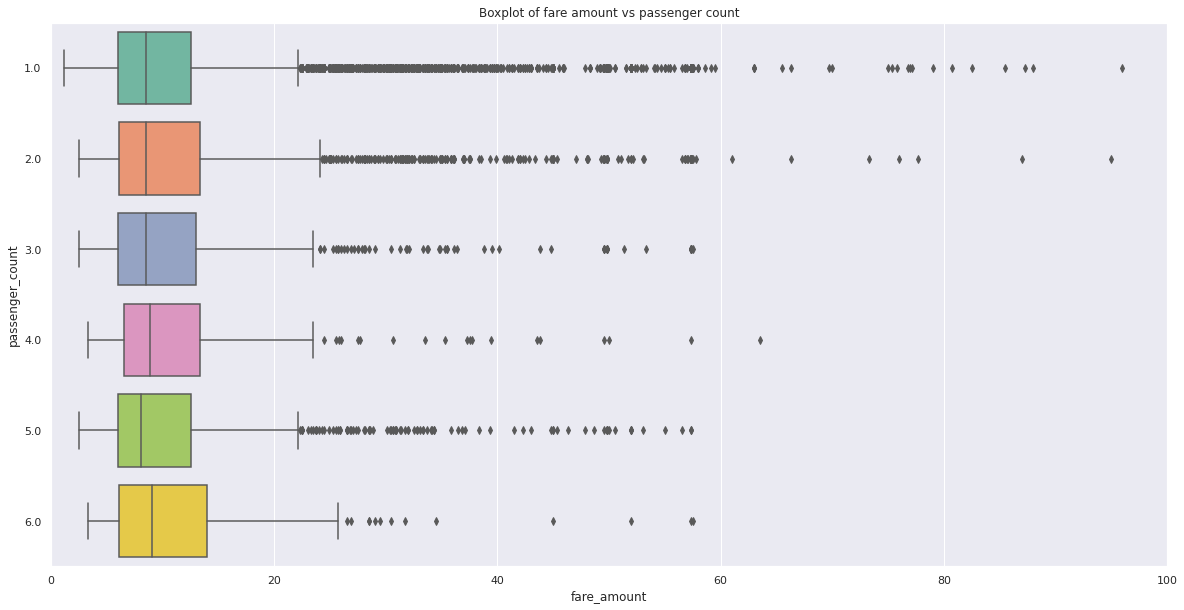

In [ ]:
plt.figure(figsize=(20,10))
plt.xlim(0,100)
sns.boxplot(x=train['fare_amount'], y=train['passenger_count'], data=train, orient='h')
plt.title('Boxplot of fare amount vs passenger count')
plt.show()

In [ ]:
#merge the pickupdatetime column with other data after imputation
train1 = pd.merge(pickup_datetime, train, right_index=True, left_index=True)
train1.head()
imputed_df = train1
imputed_df.to_csv("/content/drive/MyDrive/ML_Datasets/imputed_data.csv", index=False)

In [ ]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,15658.000000,15658.000000,15658.000000,15658.000000,15658.000000
mean,11.364818,-73.911499,40.689704,-73.906299,40.687644
std,10.780425,2.659305,2.613556,2.711095,2.632652
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377
25%,6.000000,-73.992390,40.736547,-73.991369,40.736294
50%,8.500000,-73.982050,40.753312,-73.980552,40.754238
75%,12.500000,-73.968078,40.767805,-73.965362,40.768314
max,453.000000,40.766125,41.366138,40.802437,41.366138


Info :#we can see standard deviation in fare_amount is more to need to finetune it 


## Feature Engineering for columns pickup_datetime

In [ ]:
#continue working on df version2 and reassign to train 
train = df_version2
train.shape

(15658, 7)

In [ ]:
train.head(10)

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21,4.500000,-73.844311,40.721319,-73.841610,40.712278,1.0
1,2010-01-05 16:52:16,16.900000,-74.016048,40.711303,-73.979268,40.782004,1.0
2,2011-08-18 00:35:00,5.700000,-73.982738,40.761270,-73.991242,40.750562,2.0
3,2012-04-21 04:30:42,7.700000,-73.987130,40.733143,-73.991567,40.758092,1.0
4,2010-03-09 07:51:00,5.300000,-73.968095,40.768008,-73.956655,40.783762,1.0
5,2011-01-06 09:50:45,12.100000,-74.000964,40.731630,-73.972892,40.758233,1.0
6,2012-11-20 20:35:00,7.500000,-73.980002,40.751662,-73.973802,40.764842,1.0
7,2012-01-04 17:22:00,16.500000,-73.951300,40.774138,-73.990095,40.751048,1.0
8,2012-12-03 13:10:00,6.011615,-74.006462,40.726713,-73.993078,40.731628,1.0
9,2009-09-02 01:11:00,8.900000,-73.980658,40.733873,-73.991540,40.758138,2.0


In [ ]:
#convert the pickup_datetime object to timestamp dtypes 
test['pickup_datetime'] = pd.to_datetime(test['pickup_datetime'],errors = 'coerce', format='%Y-%m-%d %H:%M:%S UTC')

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    9914 non-null   datetime64[ns]
 1   pickup_longitude   9914 non-null   float64       
 2   pickup_latitude    9914 non-null   float64       
 3   dropoff_longitude  9914 non-null   float64       
 4   dropoff_latitude   9914 non-null   float64       
 5   passenger_count    9914 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 464.8 KB


In [ ]:
#from pickup_datetime we will create the year, month, date, day, hour, minute
datasets = [train, test]
for t_set in datasets:
  #print(t_set)
  t_set['year'] = t_set['pickup_datetime'].apply(lambda row: row.year)
  t_set['month'] = t_set['pickup_datetime'].apply(lambda row: row.month)
  t_set['date'] = t_set['pickup_datetime'].apply(lambda row: row.day)
  t_set['day'] = t_set['pickup_datetime'].apply(lambda row: row.dayofweek)
  t_set['hour'] = t_set['pickup_datetime'].apply(lambda row: row.hour)
  t_set['minute'] = t_set['pickup_datetime'].apply(lambda row: row.minute)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15658 entries, 0 to 16066
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pickup_datetime    15658 non-null  datetime64[ns]
 1   fare_amount        15658 non-null  float64       
 2   pickup_longitude   15658 non-null  float64       
 3   pickup_latitude    15658 non-null  float64       
 4   dropoff_longitude  15658 non-null  float64       
 5   dropoff_latitude   15658 non-null  float64       
 6   passenger_count    15658 non-null  float64       
 7   year               15658 non-null  int64         
 8   month              15658 non-null  int64         
 9   date               15658 non-null  int64         
 10  day                15658 non-null  int64         
 11  hour               15658 non-null  int64         
 12  minute             15658 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(6)
memory usage: 1.7 

In [ ]:
test.shape

(9914, 12)

In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
0,2009-06-15 17:26:21,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26
1,2010-01-05 16:52:16,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52
2,2011-08-18 00:35:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35
3,2012-04-21 04:30:42,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30
4,2010-03-09 07:51:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51


In [ ]:
#converting passenger count from float dtype to categorical element 
test['passenger_count'] = test['passenger_count'].round().astype('object').astype('category')

In [ ]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12


In [ ]:
#Calculate the distance from longitude and latitude columns and create the distance column
#for working on geo coordinates we have a function called haversine using that we create another variable called distance
from math import radians, cos, sin, asin, sqrt

In [ ]:
def haversine(var):
  """
  Calculate the greate circle distance between two points on the earth(speicified in decimal degree)
  """
  long1 = var[0]
  latt1 = var[1]
  long2 = var[2]
  latt2 = var[3]

  #convert the decimals to radians
  long1, latt1, long2, latt2 = map(radians, [long1, latt1, long2, latt2])

  #formula
  dlong = long2 - long1
  dlatt = latt2 - latt1
  d_convertion = sin(dlatt/2)**2 + cos(latt1) * cos(latt2) * sin(dlong/2)**2
  cir = 2 * asin(sqrt(d_convertion))
  #radius of earth in km is 6371
  km = 6371 * cir
  return km


In [ ]:
#add distance column  to train and test data and apply haversine function to columns
train['distance'] = train[['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(haversine,axis=1)

In [ ]:
test['distance'] = test[['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']].apply(haversine,axis=1)

In [ ]:
print(train.shape)
print(test.shape)

(15658, 14)
(9914, 13)


In [ ]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute,distance
0,2009-06-15 17:26:21,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,2010-01-05 16:52:16,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,2011-08-18 00:35:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,2012-04-21 04:30:42,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,2010-03-09 07:51:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [ ]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,date,day,hour,minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [ ]:
#check the unique values into data
train.nunique()

pickup_datetime      15613
fare_amount            476
pickup_longitude     13719
pickup_latitude      14168
dropoff_longitude    13814
dropoff_latitude     14186
passenger_count         62
year                     7
month                   12
date                    31
day                      7
hour                    24
minute                  60
distance             15504
dtype: int64

In [ ]:
test.nunique()

pickup_datetime      1753
pickup_longitude     9124
pickup_latitude      9246
dropoff_longitude    9141
dropoff_latitude     9360
passenger_count         6
year                    7
month                  12
date                   31
day                     7
hour                   24
minute                 60
distance             9830
dtype: int64

In [ ]:
#validate the distance column with its min and maximum range upto 20
train['distance'].sort_values(ascending=False)[:20]

5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
9899       97.670590
4487       95.852036
9808       93.925599
7401       92.605848
12349      43.648755
649        39.476975
6308       37.812945
4118       32.602535
7021       29.478280
6677       26.369072
4567       25.735917
Name: distance, dtype: float64

In [ ]:
train['distance'].sort_values(ascending=True)[:20]

13446    0.0
9956     0.0
12847    0.0
14753    0.0
14763    0.0
12541    0.0
8146     0.0
8130     0.0
8123     0.0
10003    0.0
10648    0.0
10017    0.0
8068     0.0
808      0.0
5449     0.0
5452     0.0
4086     0.0
10959    0.0
10582    0.0
14940    0.0
Name: distance, dtype: float64

In [ ]:
#As we can see that from above 2 observation is distance with 0 doesnt make any sense and distance which is more than 4000km is not possible in 1 trip
#so we will remove those data to make our data free from outliers


In [ ]:
#check the count of zero distance rows
Counter(train['distance'] ==0)

Counter({False: 15503, True: 155})

In [ ]:
#check the count of zero distance rows
Counter(test['distance'] ==0)

Counter({False: 9829, True: 85})

In [ ]:
#check the count of km > 130 distance rows
Counter(train['distance'] > 130)

Counter({False: 15656, True: 2})

In [ ]:
#check the count of km > 130 distance rows
Counter(test['distance'] > 130)

Counter({False: 9914})

In [ ]:
#so we will remove total 155+2 = 157 rows as a part of outlier treatment
train = train.drop(train[train['distance'] == 0].index, axis = 0)
train = train.drop(train[train['distance'] > 130].index, axis = 0)
train.shape

(15501, 14)

In [ ]:
#Now we have seprate data for pickup_datetime so we will remove and all columns related to longitudes and latitudes are not further required
drop_column_set = ['pickup_datetime', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude' ]
train = train.drop(drop_column_set, axis=1)

In [ ]:
train.head()

,fare_amount,passenger_count,year,month,date,day,hour,minute,distance
0,4.5,1.0,2009,6,15,0,17,26,1.030764
1,16.9,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2.0,2011,8,18,3,0,35,1.389525
3,7.7,1.0,2012,4,21,5,4,30,2.799270
4,5.3,1.0,2010,3,9,1,7,51,1.999157


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15501 entries, 0 to 16066
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   fare_amount      15501 non-null  float64
 1   passenger_count  15501 non-null  float64
 2   year             15501 non-null  int64  
 3   month            15501 non-null  int64  
 4   date             15501 non-null  int64  
 5   day              15501 non-null  int64  
 6   hour             15501 non-null  int64  
 7   minute           15501 non-null  int64  
 8   distance         15501 non-null  float64
dtypes: float64(3), int64(6)
memory usage: 1.2 MB


In [ ]:
#converting back passengercount variables into int in both train and test
train['passenger_count'] = train['passenger_count'].astype('int64')
test['passenger_count'] = test['passenger_count'].astype('int64')

In [ ]:
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
minute               int64
distance           float64
dtype: object

In [ ]:
#drop the columns which is not important after feature Engineering
test = test.drop(drop_column_set, axis=1)

In [ ]:
test.head()

,passenger_count,year,month,date,day,hour,minute,distance
0,1,2015,1,27,1,13,8,2.323259
1,1,2015,1,27,1,13,8,2.425353
2,1,2011,10,8,5,11,53,0.618628
3,1,2012,12,1,5,21,12,1.961033
4,1,2012,12,1,5,21,12,5.387301


In [ ]:
test.dtypes

passenger_count      int64
year                 int64
month                int64
date                 int64
day                  int64
hour                 int64
minute               int64
distance           float64
dtype: object

## DATA Visualization

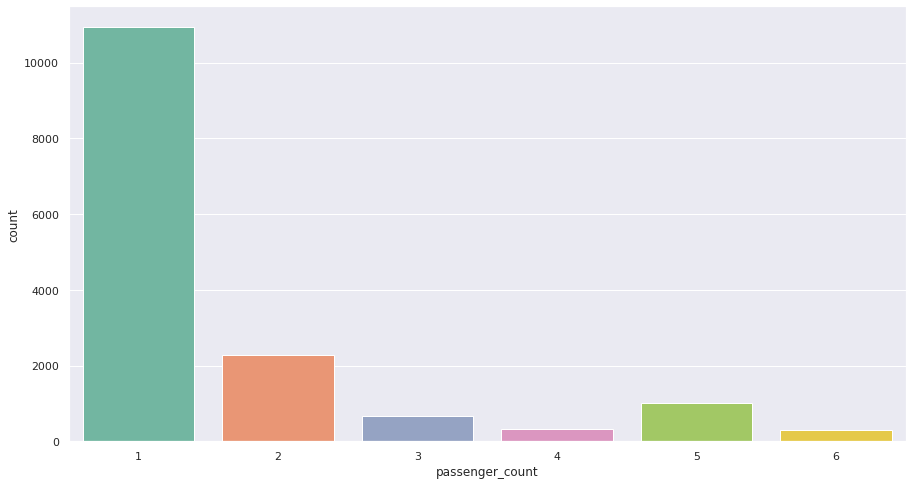

In [ ]:
#visualize the passenger count
plt.figure(figsize=(15,8))
sns.countplot(x="passenger_count", data=train)

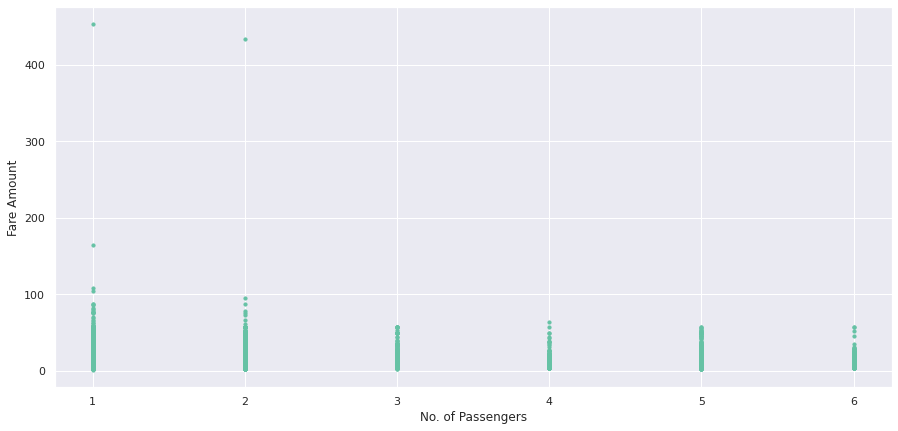

In [ ]:
#relationship between passenger count and fare
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare Amount')
plt.show()

In [ ]:
#From above 2 visualization we can say that
#1) single travelling passengers are most frequent passengers
#2) highest fare coming from single and double no of passengers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

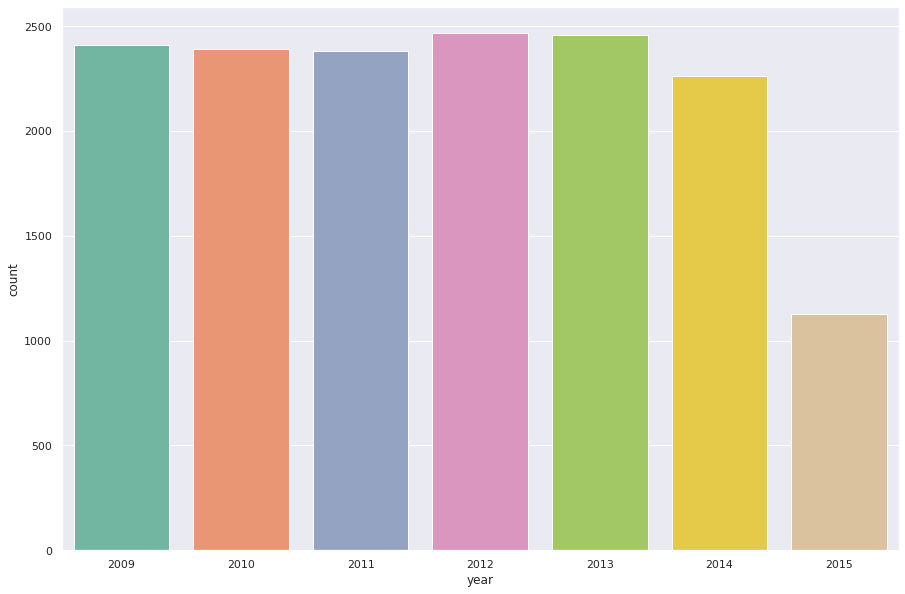

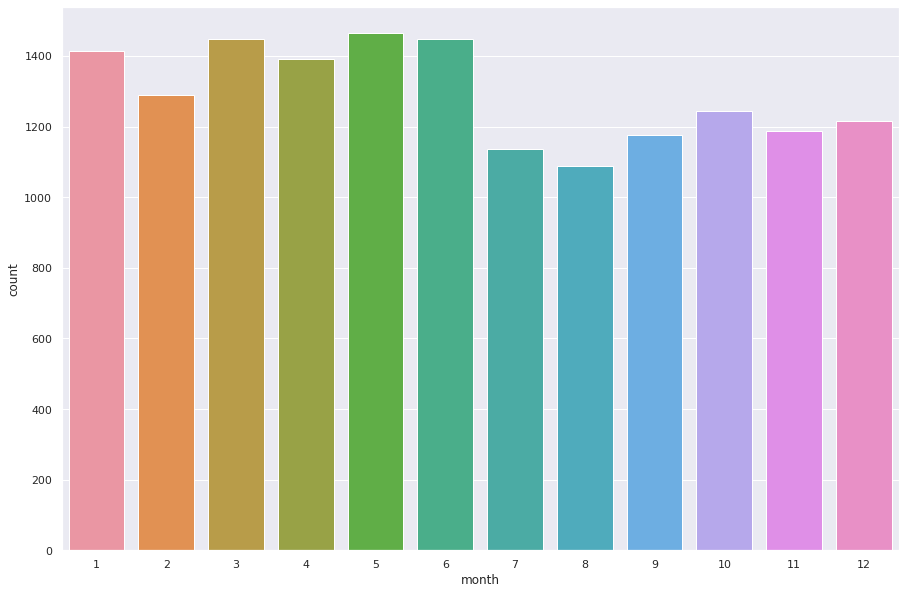

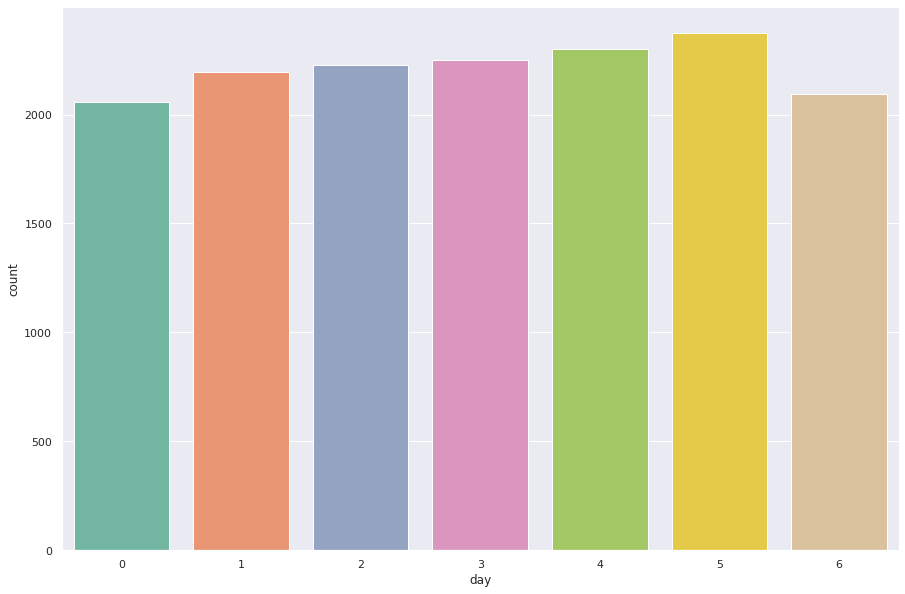

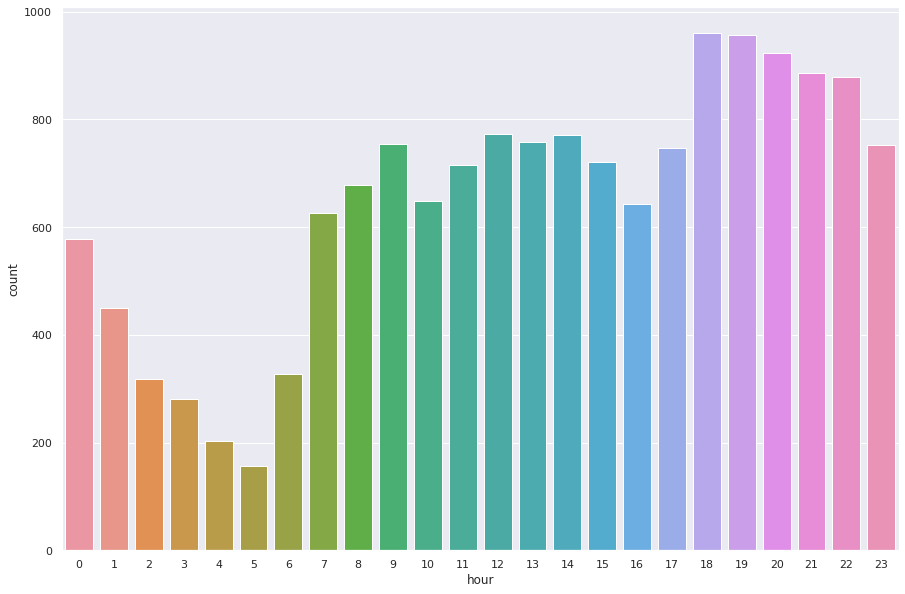

In [ ]:
#countplots on year, month, day of week, hour to understand where we have most peak
plt.figure(figsize=(15,10))
sns.countplot(train['year'])

plt.figure(figsize=(15,10))
sns.countplot(train['month'])

plt.figure(figsize=(15,10))
sns.countplot(train['day'])

plt.figure(figsize=(15,10))
sns.countplot(train['hour'])

In [ ]:
#observations from above graphs 
#1) utlization of service from year 2014 seems downfall
#2) 3rd quarter of service is affected than other quarters
#3) weekday utilization of service is more as compared to weekend
#4) cab service utilization is more in night time as compared to day time


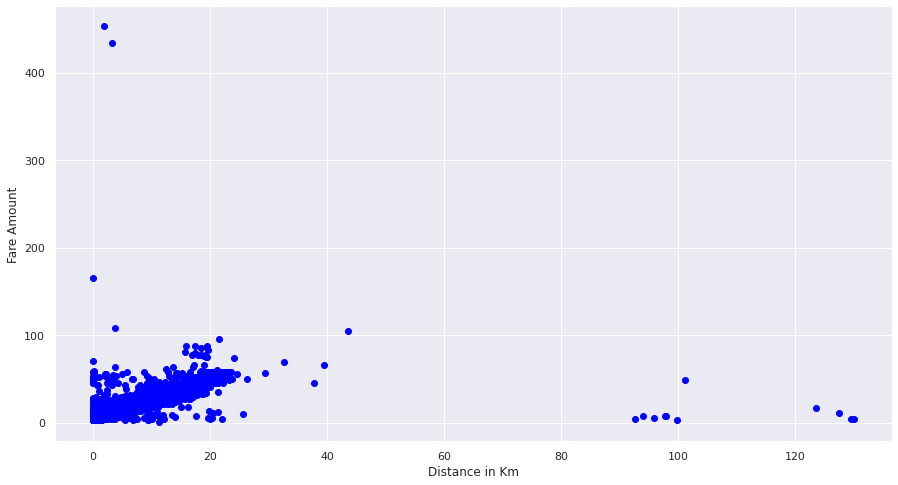

In [ ]:
#visualize relation between distance and fare
plt.figure(figsize=(15,8))
plt.scatter(x = train['distance'],y = train['fare_amount'], c = "b")
plt.xlabel('Distance in Km')
plt.ylabel('Fare Amount')
plt.show()

In [ ]:
#this graph clearly shows the effect or amount on fare

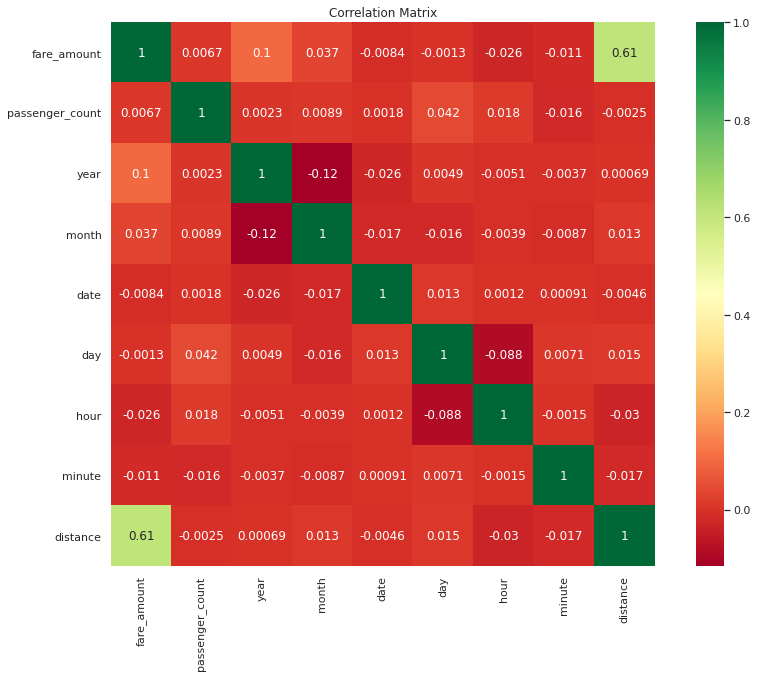

In [ ]:
#check correlation in data
plt.figure(figsize=(15,10))
heatmap_ = sns.heatmap(train.corr(), square=True, cmap='RdYlGn', annot=True)
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#from above correlation diagram we can clearly see that distance and fare is correlated

# Feature Scaling

fare_amount


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


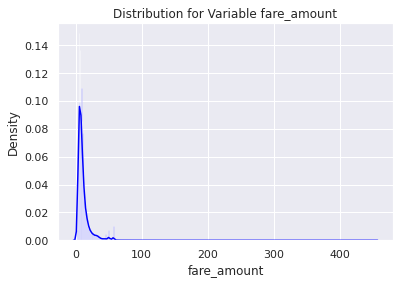

distance


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


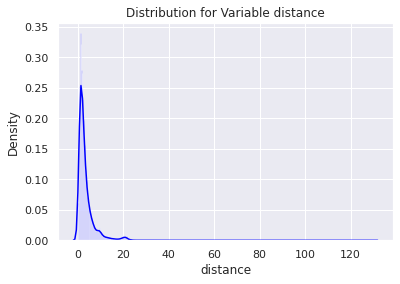

In [ ]:
#check the training dat how its distributed

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='blue')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [ ]:
#here we can see that target variable is skewed hence we need to transform to reduce skewness

train['fare_amount'] = np.log1p(train['fare_amount'])
train['distance'] = np.log1p(train['distance'])

fare_amount


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


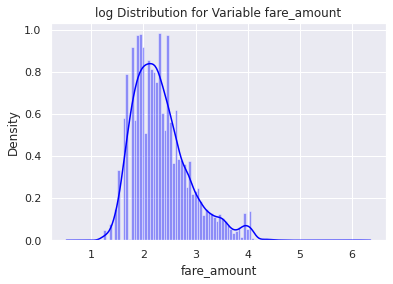

distance


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


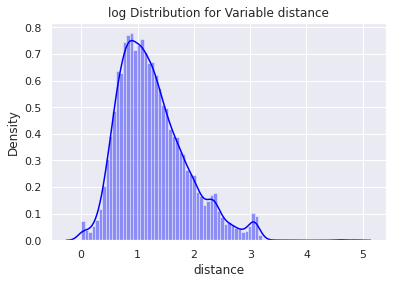

In [ ]:
#check for log converted distribution
for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(train[i],bins='auto',color='blue')
    plt.title("log Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [ ]:
#so we can see bell curve which looks like normal distribution hence we will not do any further scaling


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


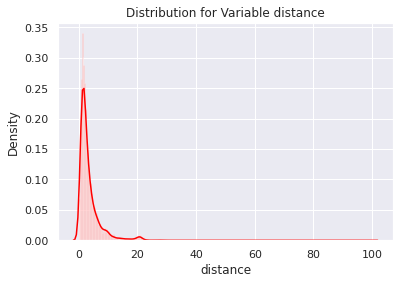

In [ ]:
#same we will apply for test data also
sns.distplot(test['distance'],bins='auto',color='red')
plt.title("Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [ ]:
#since skewness of distance variable is high we will apply log transform
test['distance'] = np.log1p(test['distance'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


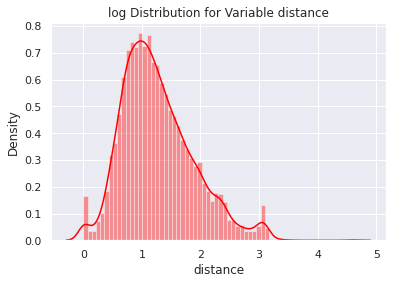

In [ ]:
#after transform check 
sns.distplot(test['distance'],bins='auto',color='red')
plt.title("log Distribution for Variable "+i)
plt.ylabel("Density")
plt.show()

In [ ]:
#final data for model 
train.head()

,fare_amount,passenger_count,year,month,date,day,hour,minute,distance
0,1.704748,1,2009,6,15,0,17,26,0.708412
1,2.884801,1,2010,1,5,1,16,52,2.246029
2,1.902108,2,2011,8,18,3,0,35,0.871095
3,2.163323,1,2012,4,21,5,4,30,1.334809
4,1.840550,1,2010,3,9,1,7,51,1.098331


# **Apply Machine learning Regression Algorithms**

Info : 
*   x_train, y_train are train subsets
*   x_test, y_test are validation subsets



In [ ]:
##train and test split for  modelling
x_train, x_test, y_train, y_test = train_test_split( train.iloc[:, train.columns != 'fare_amount'], train.iloc[:, 0], test_size = 0.25, random_state = 1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

(11625, 8)
(3876, 8)


# Linear Regression Model

In [ ]:
#building model on training dataset
LR_fit = LinearRegression().fit(x_train, y_train)

In [ ]:
#predict on train data
prediction_train_LR = LR_fit.predict(x_train)

In [ ]:
#predict on test data
prediction_test_LR = LR_fit.predict(x_test)

In [ ]:
#metric calculation RMSE for test data
##calculating RMSE for test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, prediction_test_LR))
print("Root Mean Squared Error For Test data = "+str(RMSE_test_LR))

##calculating RMSE for train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, prediction_train_LR))

print("Root Mean Squared Error For Training data = "+str(RMSE_train_LR))

Root Mean Squared Error For Test data = 0.24855938527489574
Root Mean Squared Error For Training data = 0.2759378227590264


In [ ]:
#calculate R^2 for train data
from sklearn.metrics import r2_score
r2_score(y_train, prediction_train_LR)

0.7426851654594733

In [ ]:
#calculate R^2 for test data
r2_score(y_test, prediction_test_LR)

0.7948204715133892

**Another Approach for LR with hypertuning**

In [ ]:
X = train.drop('fare_amount', axis=1).values
y = train['fare_amount'].values

In [ ]:
# Setup the parameters and distributions to sample from: param_grid
param_grid = {'copy_X':[True, False],
          'fit_intercept':[True,False]}
# Instantiate a Decision reg classifier: Lregg
Lregg = LinearRegression()

# Instantiate the gridSearchCV object: Lregg_cv
Lregg_cv = GridSearchCV(Lregg, param_grid, cv=5,scoring='r2')

# Fit it to the data
Lregg_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Decision reg Parameters: {}".format(Lregg_cv.best_params_))
print("Best score is {}".format(Lregg_cv.best_score_))

Tuned Decision reg Parameters: {'copy_X': True, 'fit_intercept': True}
Best score is 0.755864978762299


In [ ]:
# Create the regressor: reg_all
reg_all = LinearRegression(copy_X= True, fit_intercept=True)

# Fit the regressor to the training data
reg_all.fit(x_train,y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(x_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(x_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: {}".format(rmse))
print("----------------------------")
test_scores(reg_all)

R^2: 0.7948204715133892
Root Mean Squared Error: 0.24855938527489574
----------------------------
<<<------------------- Training Data Score --------------------->>>

r2 square   0.7426851654594733
Adjusted r square:0.7425079513860983
MAPE:7.600500307764352
MSE: 0.07614168202899188
RMSE: 0.2759378227590264

<<<------------------- Test Data Score --------------------->>>

r2 square   0.7948204715133892
Adjusted r square:0.7943959987365873
MAPE:7.508990133537724
MSE: 0.06178176800823405
RMSE: 0.24855938527489574


#Random Forest Regression

In [ ]:
# Create the random grid
from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(5,20,1),
               'min_samples_leaf':range(2,5,1),
                'max_features':['auto','sqrt','log2'],
              'bootstrap': [True, False],
              'min_samples_split': range(2,5,1)}
# Instantiate a Decision Forest classifier: Forest
RForest = RandomForestRegressor()

# Instantiate the gridSearchCV object: Forest_cv
RForest_cv = RandomizedSearchCV(RForest, random_grid, cv=5)

# Fit it to the data
RForest_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Random Forest Parameters: {}".format(RForest_cv.best_params_))
print("Best score is {}".format(RForest_cv.best_score_))

Tuned Random Forest Parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 9, 'bootstrap': True}
Best score is 0.7991114108807167


In [ ]:
#supporting metric function
from sklearn import metrics
def scores(y, y_):
    print('r2 square  ', metrics.r2_score(y, y_))
    print('Adjusted r square:{}'.format(1 - (1-metrics.r2_score(y, y_))*(len(y)-1)/(len(y)-x_train.shape[1]-1)))
    print('MAPE:{}'.format(np.mean(np.abs((y - y_) / y))*100))
    print('MSE:', metrics.mean_squared_error(y, y_))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y, y_))) 

def test_scores(model):
    print('<<<------------------- Training Data Score --------------------->>>')
    print()
    #Predicting result on Training data
    y_pred = model.predict(x_train)
    scores(y_train,y_pred)
    print()
    print('<<<------------------- Test Data Score --------------------->>>')
    print()
    # Evaluating on Test Set
    y_pred = model.predict(x_test)
    scores(y_test,y_pred)

[0.00417216 0.02776119 0.01351305 0.01533455 0.01094775 0.02132932
 0.01747575 0.88946623]


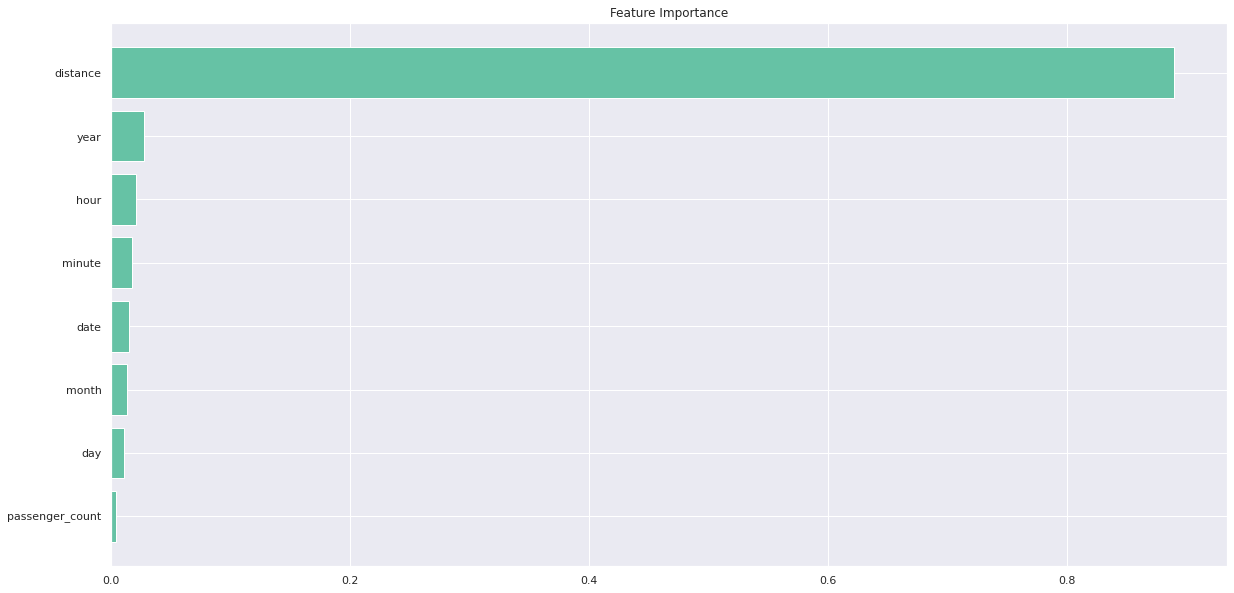

In [ ]:
# Instantiate a Forest regressor: Forest
RForest = RandomForestRegressor(n_estimators=400, min_samples_split= 2, min_samples_leaf=4, max_features='log2', max_depth=15, bootstrap=False)

# Fit the regressor to the data
RForest.fit(x_train,y_train)

# Compute and print the coefficients
RForest_features = RForest.feature_importances_
print(RForest_features)

# Sort feature importances in descending order
indices = np.argsort(RForest_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(x_train).shape[1]),RForest_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(x_train).shape[1]), names)
plt.savefig('Random forest feature importance')
plt.show()# Make predictions


In [ ]:
test_scores(RForest)

<<<------------------- Training Data Score --------------------->>>

r2 square   0.9174398815174178
Adjusted r square:0.9173830219316861
MAPE:4.4572401795996734
MSE: 0.02443025215006244
RMSE: 0.15630179829439725

<<<------------------- Test Data Score --------------------->>>

r2 square   0.813952160012309
Adjusted r square:0.8135672666272814
MAPE:7.353246576471277
MSE: 0.05602101034803118
RMSE: 0.23668757962350112


# XG Boost Regression

In [ ]:
from xgboost import XGBRegressor
import xgboost as xgb
#convert the data into matrix form
data_matrix = xgb.DMatrix(data=X, label=y)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

In [ ]:
dtrain,dtest,data_matrix

(<xgboost.core.DMatrix at 0x7feb718de450>,
 <xgboost.core.DMatrix at 0x7feb718def90>)

In [ ]:
#Instantiate the xgboost Regressor
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_matrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

[17:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.738428,0.002221,1.738392,0.009775
1,1.582475,0.002063,1.582437,0.010048
2,1.438338,0.005016,1.438676,0.016443
3,1.314760,0.005797,1.315093,0.017291
4,1.202625,0.011161,1.202977,0.021362


In [ ]:
#without hypertuning check the result
Xgb = XGBRegressor()
Xgb.fit(x_train,y_train)
# pred_xgb = model_xgb.predict(X_test)
test_scores(Xgb)

[17:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
<<<------------------- Training Data Score --------------------->>>

r2 square   0.8258154602339608
Adjusted r square:0.8256954984297142
MAPE:6.810463392740986
MSE: 0.051542709789408545
RMSE: 0.22703019576569225

<<<------------------- Test Data Score --------------------->>>

r2 square   0.8146055535428931
Adjusted r square:0.8142220118900209
MAPE:7.179923798560578
MSE: 0.05582426651192637
RMSE: 0.23627159480548304


In [ ]:
#hypertune the XGboost
# Create the random grid
random_grid = {'n_estimators': range(100,500,100),
               'max_depth': range(3,10,1),
        'reg_alpha':np.logspace(-4, 0, 50),
        'subsample': np.arange(0.1,1,0.2),
        'colsample_bytree': np.arange(0.1,1,0.2),
        'colsample_bylevel': np.arange(0.1,1,0.2),
        'colsample_bynode': np.arange(0.1,1,0.2),
       'learning_rate': np.arange(.05, 1, .05)}
# Instantiate a Decision Forest classifier: Forest
Xgb = XGBRegressor()

# Instantiate the gridSearchCV object: Forest_cv
xgb_cv = RandomizedSearchCV(Xgb, random_grid, cv=5)

# Fit it to the data
xgb_cv.fit(X, y)

# Print the tuned parameters and score
print("Tuned Xgboost Parameters: {}".format(xgb_cv.best_params_))
print("Best score is {}".format(xgb_cv.best_score_))


[17:06:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:06:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[12:42:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0.00394506 0.03280389 0.00925383 0.00688506 0.00737247 0.01213911
 0.00907949 0.9185211 ]


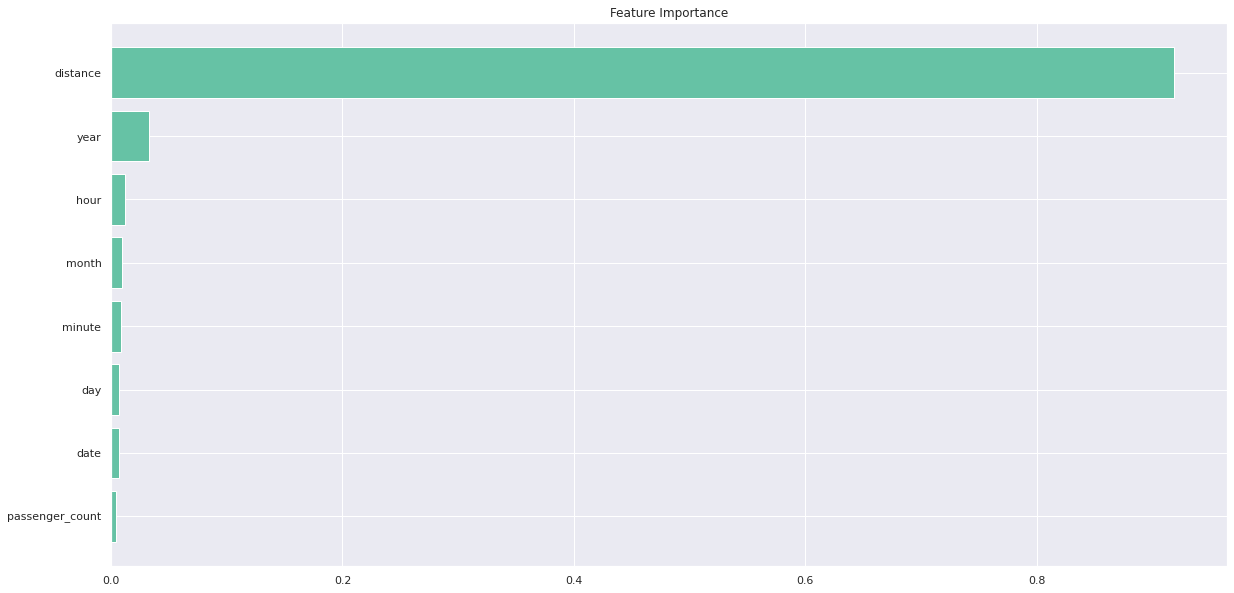

<<<------------------- Training Data Score --------------------->>>

r2 square   0.8554948600757166
Adjusted r square:0.8553953386294878
MAPE:6.284308617554664
MSE: 0.04276031902831015
RMSE: 0.20678568380888981

<<<------------------- Test Data Score --------------------->>>

r2 square   0.8121022048988186
Adjusted r square:0.8117134843503806
MAPE:7.275888375932081
MSE: 0.056578051776532017
RMSE: 0.23786141296253163


In [ ]:
# Instantiate a xgb regressor: xgb
Xgb = XGBRegressor(subsample= 0.9000000000000001, reg_alpha= 0.32374575428176433, n_estimators= 300, max_depth= 5, learning_rate=0.1, colsample_bytree= 0.5000000000000001, colsample_bynode=0.30000000000000004, colsample_bylevel=0.9000000000000001)

# Fit the regressor to the data
Xgb.fit(x_train,y_train)

# Compute and print the coefficients
xgb_features = Xgb.feature_importances_
print(xgb_features)

# Sort feature importances in descending order
indices = np.argsort(xgb_features)[::1]

# Rearrange feature names so they match the sorted feature importances
names = [test.columns[i] for i in indices]

# Creating plot
fig = plt.figure(figsize=(20,10))
plt.title("Feature Importance")

# Add horizontal bars
plt.barh(range(pd.DataFrame(x_train).shape[1]),xgb_features[indices],align = 'center')
plt.yticks(range(pd.DataFrame(x_train).shape[1]), names)
plt.savefig(' xgb feature importance')
plt.show()# Make predictions
test_scores(Xgb)

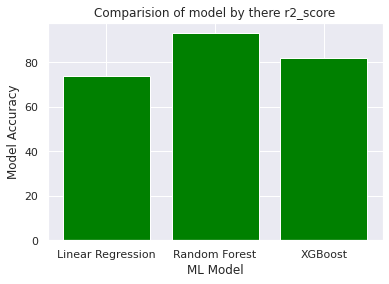

In [ ]:
#model selection graph 
# Variable x represent model
# variable y repreesnt r2 score
x = ['Linear Regression', 'Random Forest', 'XGBoost']
y = [74,93,82]
plt.bar(x,y,color='green')
plt.ylabel("Model Accuracy")
plt.xlabel("ML Model")
plt.title("Comparision of model by there r2_score")
plt.show()

# Prediction of Fare for Provided test data

Info: We will use Random Forest Regressor using Grid Search CV 

In [ ]:
prediction_RF_test_DF = RForest.predict(test)

In [ ]:
prediction_RF_test_DF

array([2.35230656, 2.41464175, 1.7298845 , ..., 3.61778716, 3.20258018,
       2.00624504])

In [ ]:
test['predicted_fare'] = prediction_RF_test_DF

In [ ]:
test.head()

,passenger_count,year,month,date,day,hour,minute,distance,predicted_fare
0,1,2015,1,27,1,13,8,1.200946,2.352307
1,1,2015,1,27,1,13,8,1.231205,2.414642
2,1,2011,10,8,5,11,53,0.481579,1.729885
3,1,2012,12,1,5,21,12,1.085538,2.245805
4,1,2012,12,1,5,21,12,1.854312,2.839577


In [ ]:
test.to_csv('final_prediction_test.csv')

In [ ]:
#save the model file into pickle file 
import joblib

In [ ]:
joblib.dump(RForest, 'cab_fare_r_forest_model.pkl')

['cab_fare_r_forest_model.pkl']

In [ ]:
#for loading the model for future sample test data use following command
#rforest_from_joblib = joblib.load('cab_fare_r_forest_model.pkl')